# Setting up Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os



cols = [0, 1, 2, 3, 4, 9, 13, 14, 15, 16, 17, 25, 27]
heads = ['ID', '$M_1$', '$M_2$', '$S_1$', '$S_2$', '$t_{pair}$', '$t_{elapsed}$', '$v_{kick}$',
         '$M_{rem}$', '$S_{rem}$', '$v_{escape}$', '$M_{tot}$', 'Gen']



def extractor(data_path: str, cluster: str):
    '''
    Returns dataframe containing metallicity in the last column, to be runned for each cluster.
    data_path should include the final "/" e.g.: data/. Also we're using Dyn.
    '''
    metal = []
    if cluster == 'gc': new_path = data_path + 'GC_chi01_output_noclusterevolv/Dyn/'
    if cluster == 'nsc': new_path = data_path + 'NSC_chi01_output_noclusterevolv/Dyn/'
    if cluster == 'ysc': new_path = data_path + 'YSC_chi01_output_noclusterevolv/Dyn/'
    for i, z in enumerate(os.listdir(new_path)):
        name = new_path + str(z) + '/nth_generation.txt'
        metal.append(pd.read_csv(name, delimiter=' ', skiprows=1, usecols=cols, names=heads))
        metal[i]['Z'] = float(z)
    whole = pd.concat(metal)
    return whole


whole_gc = extractor('data/','gc')
whole_nsc = extractor('data/','nsc')
whole_ysc = extractor('data/','ysc')
whole_gc = whole_gc[whole_gc['$t_{elapsed}$'] < 1.36e4]
whole_nsc = whole_nsc[whole_nsc['$t_{elapsed}$'] < 1.36e4]
whole_ysc = whole_ysc[whole_ysc['$t_{elapsed}$'] < 1.36e4]
display(whole_ysc)

,ID,$M_1$,$M_2$,$S_1$,$S_2$,$t_{pair}$,$t_{elapsed}$,$v_{kick}$,$M_{rem}$,$S_{rem}$,$v_{escape}$,$M_{tot}$,Gen,Z
0,281,107.048915,93.752337,0.736514,0.722379,2.153883,241.649365,188.426400,184.335360,0.890566,15.822437,33592.350341,2,0.0002
1,336,67.492992,43.469882,0.726390,0.194893,2.484705,13.788551,1209.636918,103.671524,0.848361,15.102796,26716.580696,2,0.0002
2,465,87.098849,53.798202,0.733194,0.204317,9.873946,582.505055,177.921476,131.650887,0.852063,22.237261,108093.859718,2,0.0002
3,1275,74.813984,65.575361,0.753812,0.148086,6.913526,548.293254,125.235684,131.069833,0.830147,26.238504,107442.661861,2,0.0002
4,1490,73.693135,62.271400,0.718971,0.152861,3.402012,372.686725,569.875870,127.036940,0.827985,17.909849,42183.957377,2,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,151612,157.595810,146.879985,0.889842,0.889861,3.770496,349.488281,326.378665,274.544719,0.928072,25.778644,112147.537112,3,0.0004
1128,190113,159.253628,125.854887,0.888447,0.889861,3.151255,615.751023,720.826500,257.563285,0.928066,25.693034,102550.453695,3,0.0004
1129,254509,92.818813,66.549473,0.820993,0.209186,2.719360,615.304598,366.480919,148.105314,0.863385,24.297585,66884.269876,3,0.0004
1130,400515,190.252352,131.473270,0.889861,0.888447,2.635297,1059.761697,0.000000,291.421863,0.928475,21.731492,79733.757869,3,0.0004


# Grafici

## Masses

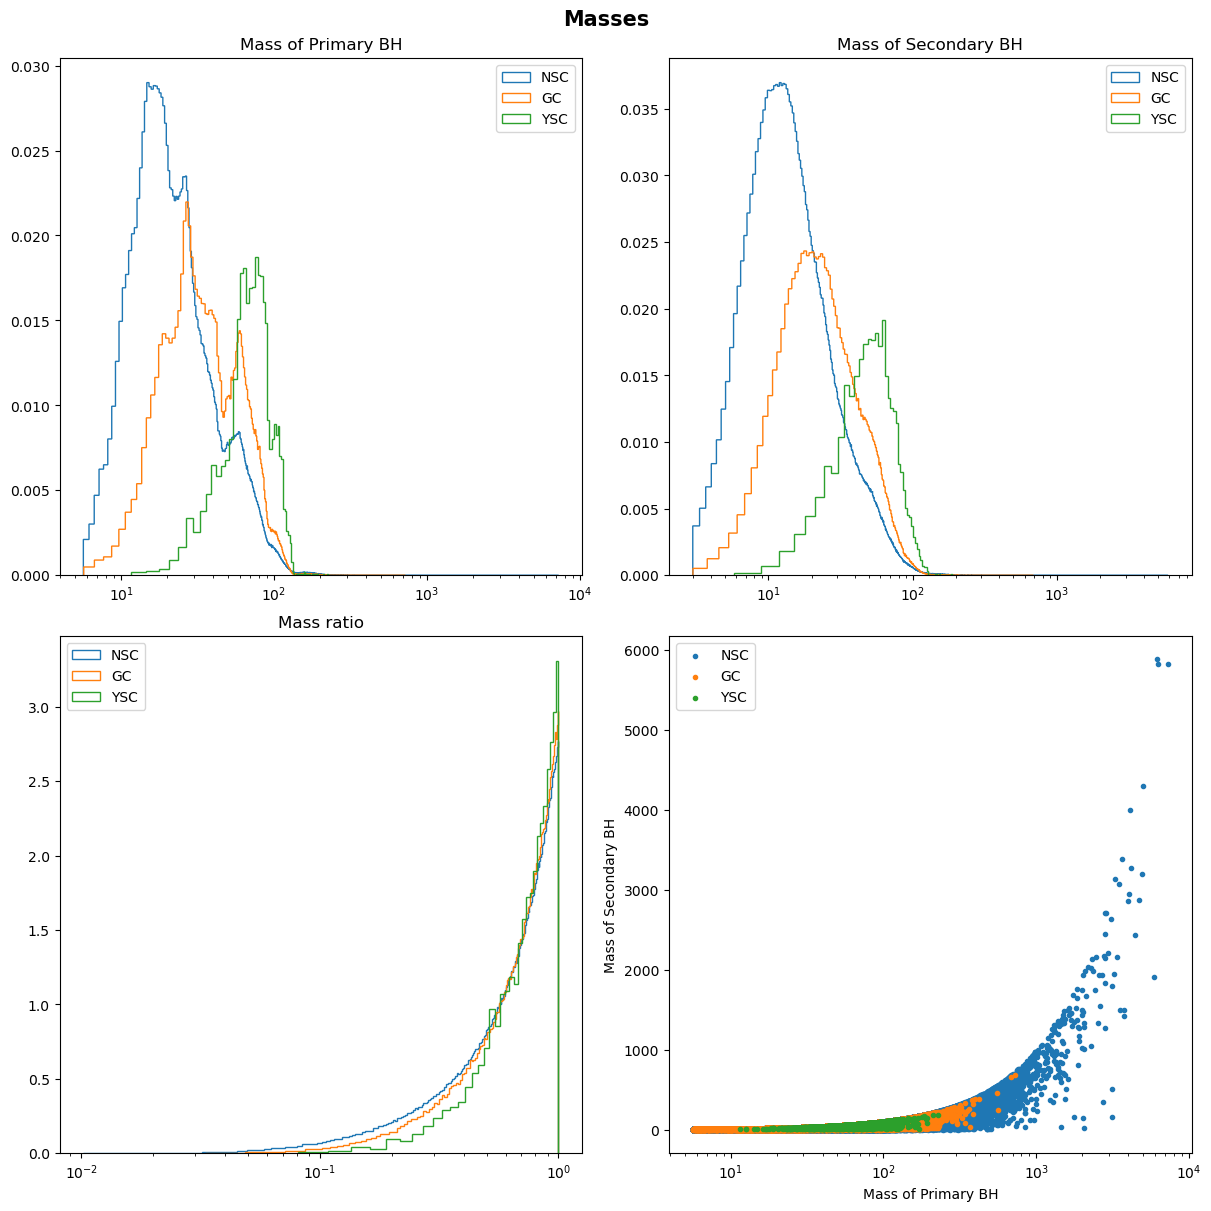

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(12,12), layout='constrained')
fig.suptitle('Masses', fontsize=15, weight='bold')

for typo, data in {'NSC':whole_nsc, 'GC':whole_gc, 'YSC':whole_ysc}.items():  # Yes, I do like dictionairies
    ax[0,0].hist(data['$M_1$'], 'auto', histtype='step', label=typo, density=True)
    ax[0,1].hist(data['$M_2$'], 'auto', histtype='step', label=typo, density=True)
    ax[1,0].hist(data['$M_2$'] / data['$M_1$'], 'auto', histtype='step', label=typo, density=True)
    ax[1,1].scatter(data['$M_1$'], data['$M_2$'], marker='.', label=typo)  # Of course the limit will be a y=x line,
# since y can't exceed x

ax[0,0].set_title('Mass of Primary BH')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xscale('log')
#ax[0,0].set_xlim(0,150)  # There are way larger values, but they aren't visible

ax[0,1].set_title('Mass of Secondary BH')
#ax[0,1].set_xlim(0,150)
ax[0,1].set_xscale('log')

ax[0,1].legend(loc='upper right')

ax[1,0].set_title('Mass ratio')
ax[1,0].legend(loc='upper left')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')


ax[1,1].set_title('')
ax[1,1].legend(loc='upper left')
ax[1,1].set_xlabel('Mass of Primary BH')
ax[1,1].set_ylabel('Mass of Secondary BH')
#ax[1,1].set_xlim(0,400)  # To show the Clusters with less BHs
#ax[1,1].set_ylim(0,400)
plt.show()


# Spin

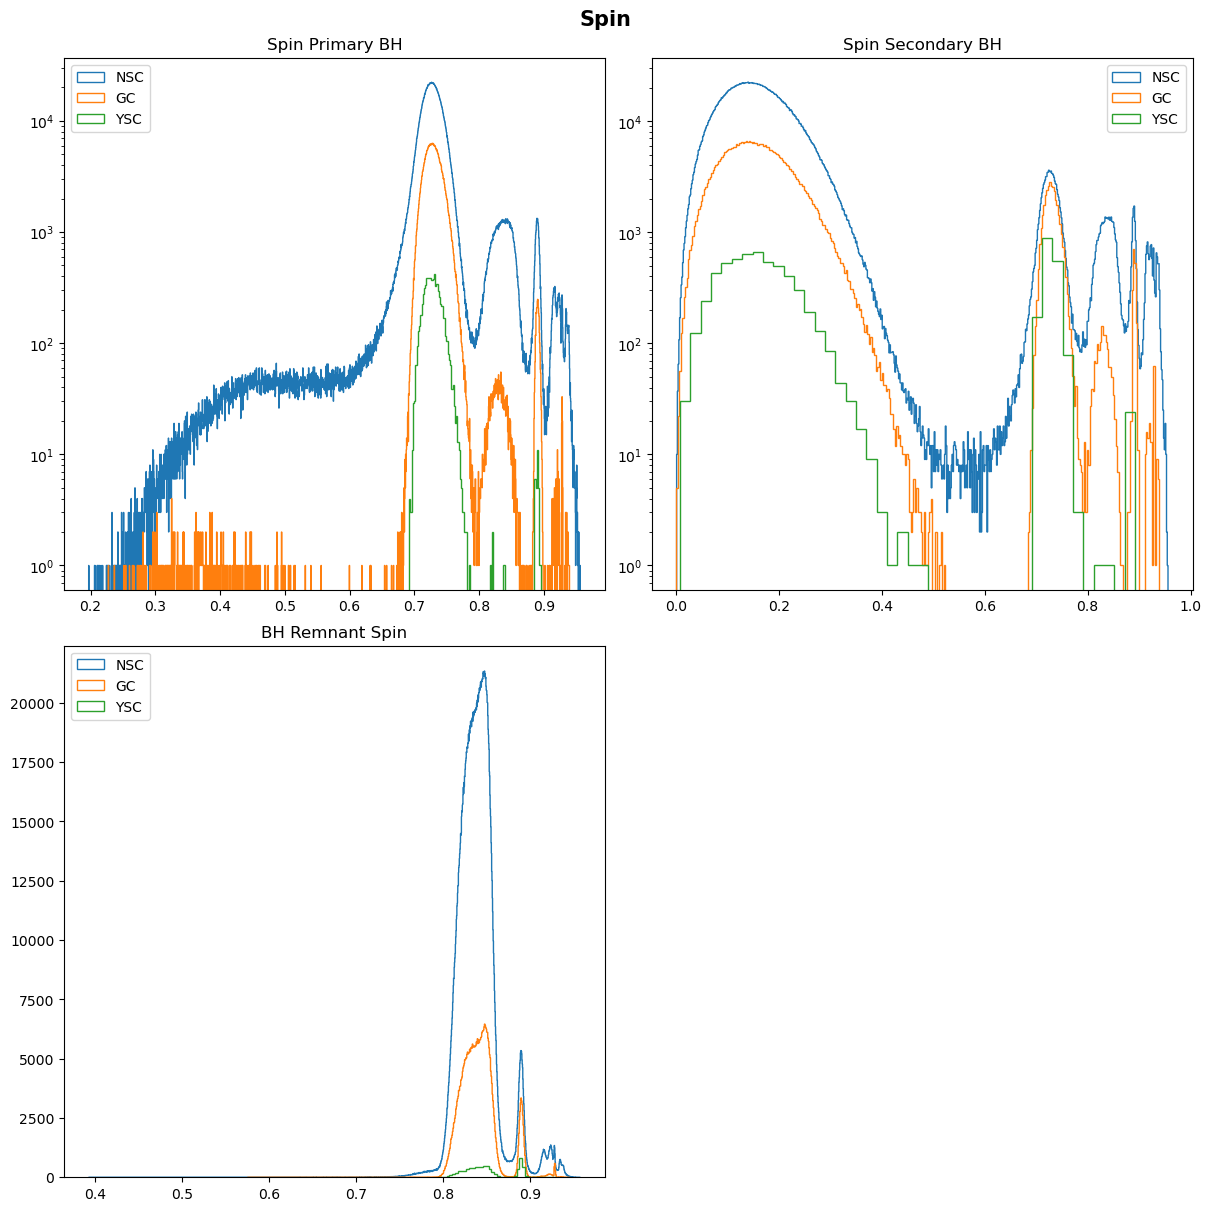

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12,12), layout='constrained')
fig.suptitle('Spin', fontsize=15, weight='bold')

for typo, data in {'NSC':whole_nsc, 'GC':whole_gc, 'YSC':whole_ysc}.items():
    ax[0,0].hist(data['$S_1$'], 'auto', histtype='step', label=typo, density=False)
    ax[0,1].hist(data['$S_2$'], 'auto', histtype='step', label=typo, density=False)
    ax[1,0].hist(data['$S_{rem}$'], 'auto', histtype='step', label=typo, density=False)
    
ax[0,0].set_title('Spin Primary BH')
ax[0,0].legend(loc='upper left')
#ax[0,0].set_xlim(.6, .95)

ax[0,1].set_title('Spin Secondary BH')
ax[0,1].legend(loc='upper right')

ax[1,0].set_title('BH Remnant Spin')
ax[1,0].legend(loc='upper left')
#ax[1,0].set_xlim(.75, .95)
for i in ((0, 0), (0,1)):
    #ax[i].set_xscale('log')
    ax[i].set_yscale('log')


ax[1,1].set_axis_off()
plt.show()

# The Other Stuff

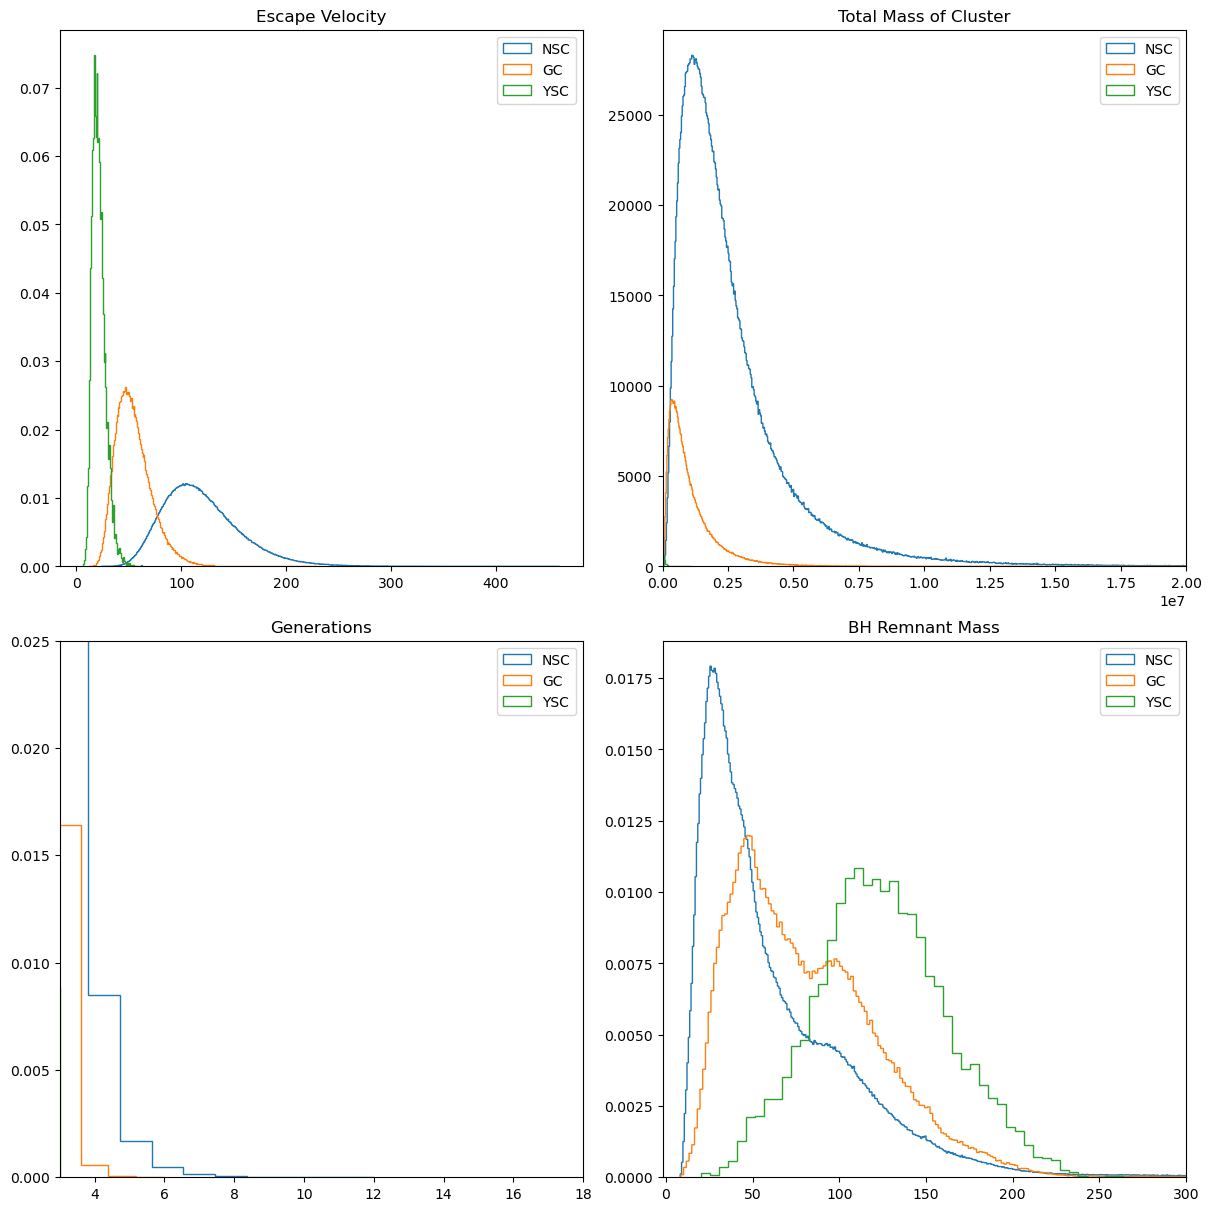

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(12,12), layout='constrained')

for typo, data in {'NSC':whole_nsc, 'GC':whole_gc, 'YSC':whole_ysc}.items():
    ax[0,0].hist(data['$v_{escape}$'], 'auto', histtype='step', label=typo, density=True)
    ax[0,1].hist(data['$M_{tot}$'], 'auto', histtype='step', label=typo) 
    ax[1,0].hist(data['Gen'], data['Gen'].nunique(), histtype='step', label=typo, density=True)
    ax[1,1].hist(data['$M_{rem}$'], 'auto', histtype='step', label=typo, density=True)

ax[0,0].set_title('Escape Velocity')
ax[0,0].legend(loc='upper right')

ax[0,1].set_title('Total Mass of Cluster')
ax[0,1].legend(loc='upper right')
ax[0,1].set_xlim(-1, 2e7)

ax[1,0].set_title('Generations')
ax[1,0].legend(loc='upper right')
ax[1,0].set_ylim(0, .025)
ax[1,0].set_xlim(3, 18)

ax[1,1].set_title('BH Remnant Mass')
ax[1,1].legend(loc='upper right')
ax[1,1].set_xlim(-2, 300)
plt.show()